# Problem Set 3, due Feb 19th midnight
## Before You Start

This problem set is about pandas (and python).  Unlike all the other
problem sets in this course, I ask you to solve this one in _python_
in _notebooks_.

Please submit
* this notebook (as .ipynb)
* html (or pdf) 'final version' of it


## Collaboration

Working together is useful and fun.  However,

* please list all your collaborators' names below here and
* submit your own work.  Copy-pasting is not ok.

collaborators:

* ...

## Readings:

This problem set assumes you can work with pandas.  Consult McKinney
Ch 5 _Getting Started with pandas_ (chapter numbering varies between
                                    editions).  Matplotlib is briefly
discussed in McKinney Ch 9.  Ch 10: _Data Aggregation and Group
Operations_ explains the, well, grouped operations.


In [12]:
# Let's import the important packages.  Depending on how do your
# exactly proceed, you may need more than these here.  

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib 
print("Maplotlib version:    %6.6s" % matplotlib.__version__)
%matplotlib inline
# needed for inline plots in notebooks
import matplotlib.pyplot as plt  

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s" % sklearn.__version__)

import seaborn as sns
from IPython.display import HTML



Numpy version:        1.15.2
SciPy version:         1.1.0
Pandas version:       0.23.0
Maplotlib version:     2.2.2
Scikit-Learn version: 0.19.1


In [13]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data
Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read
about the dataset carefully before continuing -- it is worth investing
a few minutes up front otherwise you are likely to be hopelessly
confused! 



In [14]:
from sklearn.datasets import load_boston
bdata = load_boston()
bdata

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

The following commands will provide some basic information about the shape of the data:

In [15]:
print( bdata.keys())
print( bdata.feature_names)
print( bdata.data.shape)
print( bdata.target.shape)


# uncomment the following if you want to see a lengthy description of the dataset
#print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [16]:
boston = pd.DataFrame(bdata.data)


In [17]:
boston.columns = bdata.feature_names[:]
print( boston.shape)
print(boston.head())


(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The
first thing to do is to make sure you understand how the data is
organized, what the data types are, whether there is any missing data,
and so forth. Get your bearings on your own, then answer the following
questions.

 - a: How many different variables are there in the dataset, and
      how many different observations?
 - b: how many variables are not coded as numeric?  Hint: series has a
      _dtype_ property.
 - c: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - d: Show that dataset does not contain any missing values.
 - e: Display the property tax rate in the 5 neighborhoods that have
      the lowest median housing price.

In [18]:
# a
boston['MEDV'] = bdata.target
boston

len(boston.columns)
boston.shape 

(506, 14)

In [19]:
#b
boston.dtypes
types = boston.columns.to_series().groupby(boston.dtypes).groups
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [20]:
#d
non_null_data = boston[boston.notnull().any(axis=1)]
non_null_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [21]:
boston.nsmallest(5, 'MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.35180,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.1,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


In [28]:
boston.loc[boston["CHAS"] == 1.0].count()

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
MEDV       35
dtype: int64

*Provide our answers below:*

 - a: There are 14 variables in the dataset and 506 observations. 
 - b: All 14 variables are coded as numeric.
 - c: 35 instances are classified as neighborhoods that are bounded by the Charles River. 
 - d: Dataset with no null values was returned.
 - e: The top 5 neighborhoods with the lowest median tax property rates returned.

### 1.2: Answer some basic questions about the data

 - 1.2 a: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2 b: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2 c: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2 d: Are homes in old neighborhoods smaller?  Compare the average number of rooms in the 5 oldest and 5 youngest neighborhood.
 - 1.2 e: What is the crime rate in the neighborhood with the lowest median housing price?

In [22]:
# a
expensive = boston.nlargest(1, "MEDV")

In [23]:
#b
boston.loc[boston["RM"] < 5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29,11.8
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53,14.6
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,16.1
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00,21.9
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8


In [24]:
adjacent = boston.loc[(boston['CHAS'] == 1.0)]
adjacent.nlargest(1, "MEDV")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0


In [25]:
# 5 youngest neighborhoods
youngest = boston.nsmallest(5, "AGE")
youngest["RM"].mean()


6.333600000000001

In [26]:
# 5 oldest neighborhoods
oldest = boston.nlargest(5, "AGE")
oldest["RM"].mean()


5.587599999999999

In [262]:
boston.nsmallest(1, "MEDV")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0


*Provide our answers below:*

 - 1.2.1: The median housing price in Boston's most expensive neighborhood is 50,000 dollars.
 - 1.2.2: There are 15 neighborhoods that have on average less than 5 rooms per dwelling.
 - 1.2.3: The property tax rate for the most expensive neighborhood that is also adjacent to the Charles River is 403,000. 
 - 1.2.4: Older and younger neighborhoods both have on average ~6 rooms. Older neighborhoods have ~5.5 whereas younger neighborhoods have ~6.3.
 - 1.2.5: The crime rate in the lowest median neighborhood is 38.35.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following
information (no more, no less) for each variable in the dataset.  Your
table should have K rows (one for each variable) and 7
columns, ordered as below:

- The name of the variable
- The number of observations with non-missing values
- The mean of the variable
- The standard deviation of the variable
- The minimum value of the variable
- The median of the variable
- The maximum value of the variable

In [3]:
# enter your code here
table = {"Non-null observations": len(boston), "Mean" : boston.mean(), "Standard Deviation": boston.std(), 
         "Median": boston.median(), "Minimum": boston.min(), "Maximum": boston.max()}

data['Range'] = data['Maxmimum'] - data['Minimum']

table = pd.DataFrame(table)
table


NameError: name 'boston' is not defined

### 1.4 Simple statistical test

Are newer homes more expensive?  Perhaps, as these are more modern.
But the old ones may be located in more desirable neighborhoods.
Let's find out!

- a: Split the sample into 'new' and 'old' neighborhoods using the median
age in the data as the threshold value.  (Let's ignore the neighborhoods where average
age is exactly equal to the median and only focus on older and newer ones).
- b: show the average house values in old and new neighborhoods.
- c: Using a t-test, compare the median house value in old and new
neighborhoods.  Can you reject the null hypothesis that prices are equal?

Hint: check for _t_-test in `scipy.stats`.

In [235]:
# enter your code here
new = boston.loc[boston["AGE"] < 77.50000]
old = boston.loc[boston["AGE"] > 77.50000]


In [236]:
new_mean = new["MEDV"].mean()
old_mean = old["MEDV"].mean()
print("New Mean:", new_mean, "Old Mean:" , old_mean)

New Mean: 25.80671936758895 Old Mean: 19.25889328063241


In [237]:
from scipy import stats
stats.ttest_ind(new["MEDV"], old["MEDV"])

Ttest_indResult(statistic=8.561415451892593, pvalue=1.3572590662954446e-16)

Based on the t-test done on the median house value on old and new neighborhoods, the p-value is less than 0.05 (almost 0) which indicates that the p-value is statistically significant and that we can reject the null hypothesis that the prices are equal. 

### 1.5 Grouped Operations

In these exercise, you **have to use _groupby_** grouping operator.

#### 1.5.1 Price and number of rooms

How does the average house price depend on the number of rooms?
Compute the mean price by number of rooms.  Note: as this is _average
number of rooms_, you have to convert it to an integer, or make it
categorical in another way.


In [238]:
## compute it here.  Use 'groupy' operator!
boston["RM"] = round(boston["RM"], 0)
num = boston["MEDV"].groupby(boston["RM"]).mean()
print(num)

RM
4.0    17.020000
5.0    14.945946
6.0    19.366026
7.0    28.047200
8.0    45.562500
9.0    40.633333
Name: MEDV, dtype: float64


#### 1.5.2 size and location

But the price may not just depend on the size but also on location.
Analyze the average price depending on size (as above), depending on
whether the neighborhood is adjacent to Charles river or not.

In [246]:
## analyze it here, use groupby
adj = boston.loc[boston["CHAS"] == 1.0]
non_adj = boston.loc[boston["CHAS"] == 0.0]

num_near = adj["MEDV"].groupby(adj["RM"]).mean()
num_far = non_adj["MEDV"].groupby(non_adj["RM"]).mean()

print("Near:", num_near, "Far:", num_far)


Near: RM
5.0    17.000000
6.0    22.956250
7.0    34.111111
8.0    46.240000
9.0    21.900000
Name: MEDV, dtype: float64 Far: RM
4.0    17.020000
5.0    14.696970
6.0    19.171959
7.0    27.576724
8.0    45.384211
9.0    50.000000
Name: MEDV, dtype: float64


## Part 2: Histograms and Scatterplots

### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic
histogram of median housing prices (the "target" variable) for your
dataset.  Your first task is to make this graph look pretty by doing
the following:

1. Add appropriate titles and labels to, make sure to explain the units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black
borders from the bars
5. Ensure the histogram does not result in printing incomprehensible list of numbers in the output cell as this sample code does. 


Text(0,0.5,'Frequency')

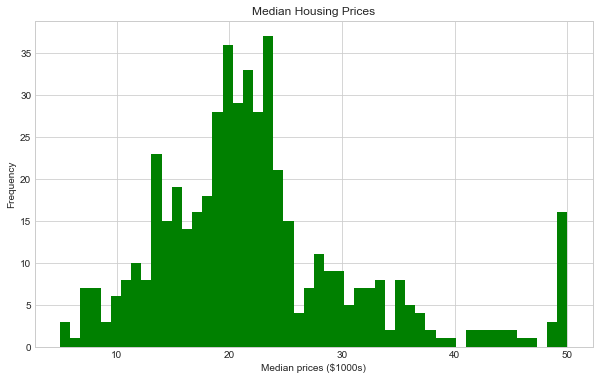

In [247]:
# edit the code below to make the graph look good
ax, fig = plt.subplots(figsize=(10,6))
plt.hist(bdata.target, color = "green", bins = 50)
plt.title("Median Housing Prices")
plt.xlabel("Median prices ($1000s)")
plt.ylabel("Frequency")



### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.


Text(0,0.5,'Median Price')

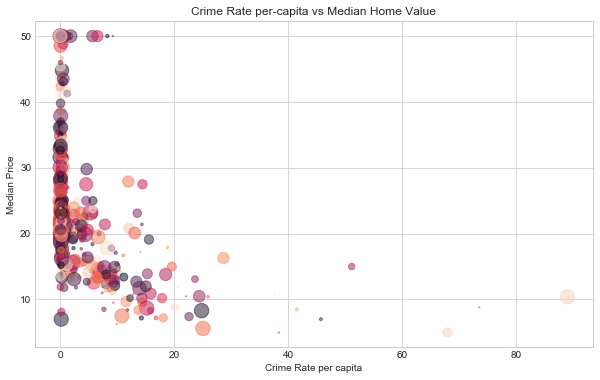

In [212]:
# enter your code here
# Scatter plot source: https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py
ax, fig = plt.subplots(figsize=(10,6))
N = 506
colors = np.random.rand(N)
area = (15 * np.random.rand(N))**2 
plt.scatter(boston["CRIM"], boston["MEDV"], s = area, alpha = 0.5, c = colors)
plt.title("Crime Rate per-capita vs Median Home Value")
plt.xlabel("Crime Rate per capita")
plt.ylabel("Median Price")

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be
a relationship between crime rates and housing prices in Boston?
Calculate the correlation between these two variables. Do you think
this relationship is causal, or just a correlation?   Can you provide
examples of all 3 ways the causality may go here?



In [82]:
# compute correlation (should be b/w -1 and 1)
corr = np.corrcoef(boston["CRIM"], boston["MEDV"])
corr[0,1]

-0.3858316898839907

*Write your thoughts here (1-2 paragraphs).*

There does not seem to be a strong relationship between crime rates and housing prices in Boston. This relationship is not causal, but rather a weak, negative correlation since the correlation coefficient is about -0.385. Three ways of how causality may go here are: 
1. (X causing Y): Low crime rates cause high median housing prices.
2. (Y causing X): High median housing prices cause low crime rates.
3. (External causes): Gentrification could impact both crime rates and housing prices. If the government intervenes and makes changes in cities (example: building a new school in a neighborhood), it can increase demand for housing and thus increase prices, which in turn can drive those with lower incomes out of these neighborhoods since they cannot afford it. Without access to proper education or homing, it can lead to people engaging in criminal activity.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the
dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*)
cell is the correlation between the *i*th and *j*th variable. Show off
your skills by coloring the cell so that large positive correlations
appear green and large negative correlations appear red (use a
gradient to make this pretty). What two variables appear to me most
positively and negatively correlated?

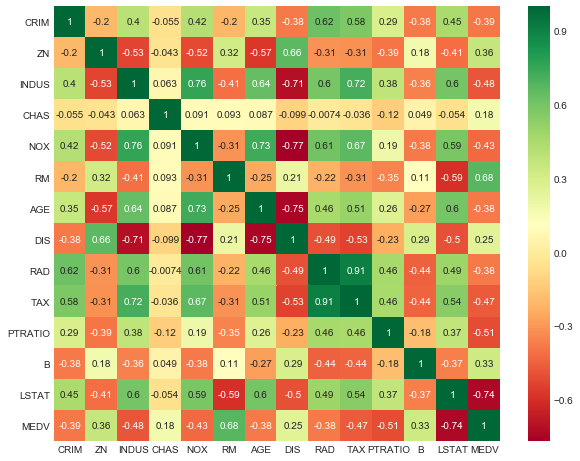

In [211]:
# enter your code here
## hint: check out matplotlib colorbar function

ax, fig = plt.subplots(figsize=(10,8))
corr_matrix = boston.corr()
sns.heatmap(data=corr_matrix, cmap="RdYlGn", annot = True)



From the correlation matrix, we can see a strong positive correlation between median housing prices (MEDV) and the average number of rooms per dwelling (RM). The lower status of the population (LSTAT) has a strong negative correlation with MEDV. RAD (index of accessibility to radial highways)and TAX (full-value property-tax rate) have the strongest correlation with each other of 0.91 whereas DIS (weighted mean of distances to five Boston employment centres) and NOX (nitrogen oxides concentration) have the strongest negative correlation of -0.77.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting
pattern in the data.  Be creative in your visualization, and make sure
to produce a "publication-quality" graph.  Points will be given for
useful and creative graphs; points will be deducted for confusing
issues like unlabeled axes.  If you're new to data visualization,
[this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209)
is a good place to start.

Text(0,0.5,'Median Price ($1000s)')

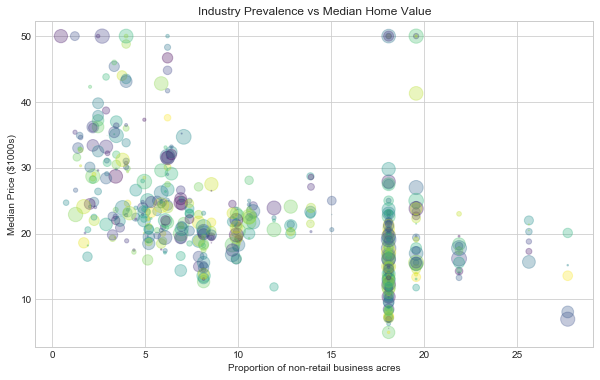

In [274]:
# enter your code here
ax, fig = plt.subplots(figsize=(10,6))

N = 506
colors = np.random.rand(N)
area = (15 * np.random.rand(N))**2 
plt.scatter(boston["INDUS"], boston["MEDV"], s = area, c= colors, alpha = 0.3, cmap='viridis')
plt.title("Industry Prevalence vs Median Home Value")
plt.xlabel("Proportion of non-retail business acres")
plt.ylabel("Median Price ($1000s)")

The graph above shows the relationship between median house prices which is dependent on the proportion of non-retail business acres per town. I was interested in seeing if there was a relationship between the two because I wanted to explore if neighborhoods that had more industrial prevalence had houses that were in the higher price range since commuting to these jobs would be closer to workers. However, from this graph it seems that in areas where there are less industrial acres, the housing prices are higher. After exploring this, I am interested in seeing salaries between job distributions to understand how location of jobs plays a factor in a one's everyday life.

## 3. Finally, tell us how many hours did you spend solving this problem set?
I spent about 4 hours on this problem set. Thanks, Ott & teaching team! :)